In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st

import parse

t_data = np.loadtxt('timedata.dat')
x_data = np.loadtxt('data.dat')
x_true = np.loadtxt('true.dat')

Ytrue = x_true

Ndays = 720
dt = 1/10 # timestep
tgrd = 10*Ndays #
ttrue = np.zeros((1,tgrd))
ttrue[0,:]  = np.linspace(0,Ndays,tgrd)

skip = 1

# gamma = 1/7
# delta = 1/180
# beta = 0.18

# Ndays = 720
# dt = 1/10 # timestep
# tgrd = 10*Ndays # time integration grid
# ttrue = np.zeros((1,tgrd))
# ttrue[0,:]  = np.linspace(0,Ndays,tgrd) # Define time axis

# Ytrue= np.zeros((3,tgrd))

# Ytrue[:,0] = [0.999,0.001,0]
# for kk in range(1,tgrd):
#     Ytrue[0,kk] = Ytrue[0,kk-1] + dt*(-beta*Ytrue[0,kk-1]*Ytrue[1,kk-1] + delta*Ytrue[2,kk-1])
#     Ytrue[1,kk] = Ytrue[1,kk-1] + dt*(beta*Ytrue[0,kk-1]*Ytrue[1,kk-1] - gamma*Ytrue[1,kk-1])
#     Ytrue[2,kk] = Ytrue[2,kk-1] + dt*(gamma*Ytrue[1,kk-1] - delta*Ytrue[2,kk-1])


In [8]:
## SIRS

[t,x1_mean,x1_var] =  parse.parseXML('ModelSIRS_SIRS-state-estimation0.xml')

maps = np.loadtxt('chains/ModelSIRS_SIRS-map.dat')
gamma = maps[0]
delta = maps[1]
sigma = maps[2]


Ndays = 220
tdata = np.arange(0,Ndays)
sampFac = 10 # sample every sampFac time step
dt = 1/10 # timestep
tgrd = 10*Ndays # time integration grid
tlist = np.zeros((1,tgrd))
tlist[0,:]  = np.linspace(-1,Ndays,tgrd) # Define time axis

Nsamp = 1000 # 500*skip

i1, b1 = np.zeros((Nsamp,tgrd)), np.zeros((Nsamp,tgrd))
Yforecast = np.zeros((4,tgrd))

samp = np.random.multivariate_normal(x1_mean[:,-1], np.reshape(x1_var[:,-1],[4,4]), size=Nsamp)

print(x1_mean[:,-1])

np.random.seed(123)
for ii in range(Nsamp):
  Yforecast[:,0] = samp[ii]
  for kk in range(1,tgrd):
    Yforecast[0,kk] = Yforecast[0,kk-1] + dt*(-Yforecast[3,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1] + delta*Yforecast[2,kk-1])
    Yforecast[1,kk] = Yforecast[1,kk-1] + dt*(Yforecast[3,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1] - gamma*Yforecast[1,kk-1])
    Yforecast[2,kk] = Yforecast[2,kk-1] + dt*(gamma*Yforecast[1,kk-1] - delta*Yforecast[2,kk-1])
    Yforecast[3,kk] = Yforecast[3,kk-1] + sigma*np.sqrt(dt)*np.random.normal(0,1)

  i1[ii,:] = Yforecast[1,:]
  b1[ii,:] = Yforecast[3,:]

mean_i1 = np.mean(i1,axis=0)
mean_b1 = np.mean(b1,axis=0)


Igrd = np.linspace(0,0.015,201)
Ipdf_0 = st.gaussian_kde(i1[:,0],bw_method = 0.2)
Ipdf_5 = st.gaussian_kde(i1[:,500],bw_method = 0.2)
Ipdf_10 = st.gaussian_kde(i1[:,1000],bw_method = 0.2)
Ipdf_15 = st.gaussian_kde(i1[:,1500],bw_method = 0.2)
Ipdf_20 = st.gaussian_kde(i1[:,2000],bw_method = 0.2)
# Imax = np.max([Ipdf_5(Igrd),Ipdf_10(Igrd),Ipdf_15(Igrd),Ipdf_20(Igrd)])
Imax = np.max([Ipdf_0(Igrd),Ipdf_5(Igrd),Ipdf_10(Igrd),Ipdf_15(Igrd),Ipdf_20(Igrd)])

Bgrd = np.linspace(0.175,0.185,201)
Bpdf_0 = st.gaussian_kde(b1[:,0],bw_method = 0.2)
Bpdf_5 = st.gaussian_kde(b1[:,500],bw_method = 0.2)
Bpdf_10 = st.gaussian_kde(b1[:,1000],bw_method = 0.2)
Bpdf_15 = st.gaussian_kde(b1[:,1500],bw_method = 0.2)
Bpdf_20 = st.gaussian_kde(b1[:,2000],bw_method = 0.2)
# Bmax = np.max([Bpdf_5(Bgrd),Bpdf_10(Bgrd),Bpdf_15(Bgrd),Ipdf_20(Bgrd)])
Bmax = np.max([Bpdf_0(Bgrd),Bpdf_5(Bgrd),Bpdf_10(Bgrd),Bpdf_15(Bgrd),Ipdf_20(Bgrd)])

[0.819511   0.00922373 0.171269   0.185591  ]


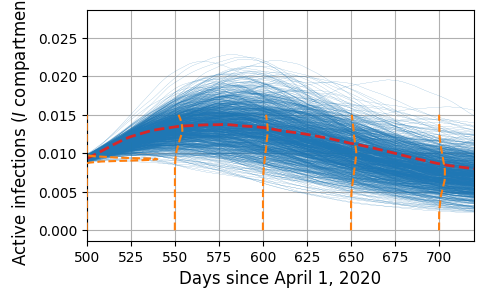

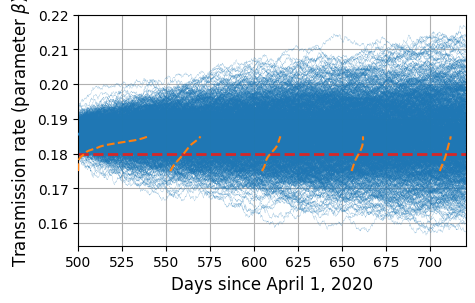

In [9]:
f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(500+tlist[0,:],i1[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(500+tlist[0,:],mean_i1,linewidth=2,c='tab:blue',zorder=2)
plt.plot(ttrue[0,:],Ytrue[1,:],linewidth=2,c='tab:red',linestyle='--',zorder=2)

plt.plot(500+Ipdf_0(Igrd)*40/Imax,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(550+Ipdf_5(Igrd)*40/Imax,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(600+Ipdf_10(Igrd)*40/Imax,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(650+Ipdf_15(Igrd)*40/Imax,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(700+Ipdf_20(Igrd)*40/Imax,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
# plt.fill_between(272+t,x_mean[1,:]+3*np.sqrt(x_var[5,:]),x_mean[1,:]-3*np.sqrt(x_var[5,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
# plt.xticks([272, 279, 286,293,300])
plt.xlim([500,720])
# plt.ylim([0,0.015])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Active infections ($I$ compartment)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('forecast_i_1.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(500+tlist[0,:],b1[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(500+tlist[0,:],mean_b1,linewidth=2,c='tab:blue',zorder=3)
plt.plot([500,720],[0.18,0.18],linewidth=2,c='tab:red',linestyle='--',zorder=2)
plt.plot(500+Bpdf_0(Bgrd)*40/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(550+Bpdf_5(Bgrd)*40/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(600+Bpdf_10(Bgrd)*40/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(650+Bpdf_15(Bgrd)*40/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(700+Bpdf_20(Bgrd)*40/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
# plt.fill_between(272+t,x_mean[3,:]+3*np.sqrt(x_var[15,:]),x_mean[3,:]-3*np.sqrt(x_var[15,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
# plt.xticks([272, 279, 286,293,300])
plt.xlim([500,720])
# plt.ylim([0.175,0.185])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Transmission rate (parameter $\beta$)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('forecast_beta_1.pdf',bbox_inches='tight')

In [10]:
## SIS

[t,x2_mean,x2_var] =  parse.parseXML('ModelSIRS_SIS-state-estimation0.xml')

maps = np.loadtxt('chains/ModelSIRS_SIS-map.dat')
alpha = maps[0]
sigma = maps[1]


Ndays = 220
tdata = np.arange(0,Ndays)
sampFac = 10 # sample every sampFac time step
dt = 1/10 # timestep
tgrd = 10*Ndays # time integration grid
tlist = np.zeros((1,tgrd))
tlist[0,:]  = np.linspace(-1,Ndays,tgrd) # Define time axis

gamma = 1/14
Nsamp = 1000

i2, b2 = np.zeros((Nsamp,tgrd)), np.zeros((Nsamp,tgrd))
Yforecast = np.zeros((3,tgrd))

samp = np.random.multivariate_normal(x2_mean[:,-1], np.reshape(x2_var[:,-1],[3,3]), size=Nsamp)


np.random.seed(123)
for ii in range(Nsamp):
  Yforecast[:,0] = samp[ii]
  for kk in range(1,tgrd):
    Yforecast[0,kk] = Yforecast[0,kk-1] + dt*(-Yforecast[2,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1] + alpha*Yforecast[1,kk-1])
    Yforecast[1,kk] = Yforecast[1,kk-1] + dt*(Yforecast[2,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1] - alpha*Yforecast[1,kk-1])
    Yforecast[2,kk] = Yforecast[2,kk-1] + sigma*np.sqrt(dt)*np.random.normal(0,1)

  i2[ii,:] = Yforecast[1,:]
  b2[ii,:] = Yforecast[2,:]

mean_i2 = np.mean(i2,axis=0)
mean_b2= np.mean(b2,axis=0)


Igrd = np.linspace(0,0.3,201)
Ipdf_0 = st.gaussian_kde(i2[:,0],bw_method = 0.2)
Ipdf_5 = st.gaussian_kde(i2[:,500],bw_method = 0.2)
Ipdf_10 = st.gaussian_kde(i2[:,1000],bw_method = 0.2)
Ipdf_15 = st.gaussian_kde(i2[:,1500],bw_method = 0.2)
Ipdf_20 = st.gaussian_kde(i2[:,2000],bw_method = 0.2)
# Imax = np.max([Ipdf_5(Igrd),Ipdf_10(Igrd),Ipdf_15(Igrd),Ipdf_20(Igrd)])
Imax = np.max([Ipdf_0(Igrd),Ipdf_5(Igrd),Ipdf_10(Igrd),Ipdf_15(Igrd),Ipdf_20(Igrd)])

Bgrd = np.linspace(0.07,0.19,201)
Bpdf_0 = st.gaussian_kde(b2[:,0],bw_method = 0.2)
Bpdf_5 = st.gaussian_kde(b2[:,500],bw_method = 0.2)
Bpdf_10 = st.gaussian_kde(b2[:,1000],bw_method = 0.2)
Bpdf_15 = st.gaussian_kde(b2[:,1500],bw_method = 0.2)
Bpdf_20 = st.gaussian_kde(b2[:,2000],bw_method = 0.2)
# Bmax = np.max([Bpdf_5(Bgrd),Bpdf_10(Bgrd),Bpdf_15(Bgrd),Ipdf_20(Bgrd)])
Bmax = np.max([Bpdf_0(Bgrd),Bpdf_5(Bgrd),Bpdf_10(Bgrd),Bpdf_15(Bgrd),Bpdf_20(Bgrd)])

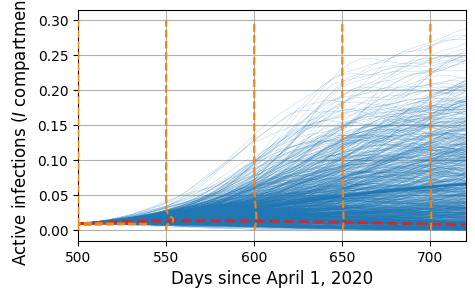

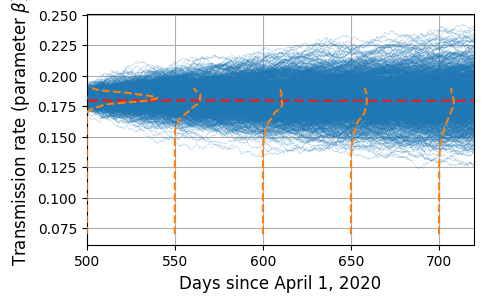

In [11]:
skip = 1

f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(500+tlist[0,:],i2[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(500+tlist[0,:],mean_i2,linewidth=2,c='tab:blue',zorder=2)
plt.plot(ttrue[0,:],Ytrue[1,:],linewidth=2,c='tab:red',linestyle='--',zorder=2)
plt.plot(500+Ipdf_0(Igrd)*40/Imax,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(550+Ipdf_5(Igrd)*40/Imax,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(600+Ipdf_10(Igrd)*40/Imax,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(650+Ipdf_15(Igrd)*40/Imax,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(700+Ipdf_20(Igrd)*40/Imax,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
# plt.fill_between(272+t,x_mean[1,:]+3*np.sqrt(x_var[5,:]),x_mean[1,:]-3*np.sqrt(x_var[5,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xticks(np.arange(500,750,50))
plt.xlim([500,720])
# plt.ylim([0,0.3])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Active infections ($I$ compartment)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('forecast_i_2.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(500+tlist[0,:],b2[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(500+tlist[0,:],mean_b2,linewidth=2,c='tab:blue',zorder=3)
plt.plot([500,720],[0.18,0.18],linewidth=2,c='tab:red',linestyle='--',zorder=2)
plt.plot(500+Bpdf_0(Bgrd)*40/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(550+Bpdf_5(Bgrd)*40/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(600+Bpdf_10(Bgrd)*40/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(650+Bpdf_15(Bgrd)*40/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(700+Bpdf_20(Bgrd)*40/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
# plt.fill_between(272+t,x_mean[3,:]+3*np.sqrt(x_var[15,:]),x_mean[3,:]-3*np.sqrt(x_var[15,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xticks(np.arange(500,750,50))
plt.xlim([500,720])
# plt.ylim([0.07,0.19])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Transmission rate (parameter $\beta$)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('forecast_beta_2.pdf',bbox_inches='tight')

In [12]:
## SIR

[t,x3_mean,x3_var] =  parse.parseXML('ModelSIRS_SIR-state-estimation0.xml')
maps = np.loadtxt('chains/ModelSIRS_SIR-map.dat')
gamma = maps[0]
sigma = maps[1]


Ndays = 220
tdata = np.arange(0,Ndays)
sampFac = 10 # sample every sampFac time step
dt = 1/10 # timestep
tgrd = 10*Ndays # time integration grid
tlist = np.zeros((1,tgrd))
tlist[0,:]  = np.linspace(-1,Ndays,tgrd) # Define time axis

gamma = 1/14
Nsamp = 1000

i3, b3 = np.zeros((Nsamp,tgrd)), np.zeros((Nsamp,tgrd))
Yforecast = np.zeros((4,tgrd))

samp = np.random.multivariate_normal(x3_mean[:,-1], np.reshape(x3_var[:,-1],[4,4]), size=Nsamp)


np.random.seed(123)
for ii in range(Nsamp):
  Yforecast[:,0] = samp[ii]
  for kk in range(1,tgrd):
    Yforecast[0,kk] = Yforecast[0,kk-1] + dt*(-Yforecast[3,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1])
    Yforecast[1,kk] = Yforecast[1,kk-1] + dt*(Yforecast[3,kk-1]*Yforecast[0,kk-1]*Yforecast[1,kk-1] - gamma*Yforecast[1,kk-1])
    Yforecast[2,kk] = Yforecast[2,kk-1] + dt*(gamma*Yforecast[1,kk-1])
    Yforecast[3,kk] = Yforecast[3,kk-1] + sigma*np.sqrt(dt)*np.random.normal(0,1)

  i3[ii,:] = Yforecast[1,:]
  b3[ii,:] = Yforecast[3,:]

mean_i3 = np.mean(i3,axis=0)
mean_b3 = np.mean(b3,axis=0)


Igrd = np.linspace(0,0.055,201)
Ipdf_0 = st.gaussian_kde(i3[:,0],bw_method = 0.2)
Ipdf3_0 = Ipdf_0(Igrd)/ np.max(Ipdf_0(Igrd))
Ipdf_5 = st.gaussian_kde(i3[:,500],bw_method = 0.2)
Ipdf3_5 = Ipdf_5(Igrd)/ np.max(Ipdf_5(Igrd))
Ipdf_10 = st.gaussian_kde(i3[:,1000],bw_method = 0.2)
Ipdf3_10 = Ipdf_10(Igrd)/ np.max(Ipdf_10(Igrd))
Ipdf_15 = st.gaussian_kde(i3[:,1500],bw_method = 0.2)
Ipdf3_15 = Ipdf_15(Igrd)/ np.max(Ipdf_15(Igrd))
Ipdf_20 = st.gaussian_kde(i3[:,2000],bw_method = 0.2)
Ipdf3_20 = Ipdf_20(Igrd)/ np.max(Ipdf_20(Igrd))
# Imax = np.max([Ipdf_5(Igrd),Ipdf_10(Igrd),Ipdf_15(Igrd),Ipdf_20(Igrd)])
# Imax = np.max([Ipdf_0(Igrd),Ipdf_5(Igrd),Ipdf_10(Igrd),Ipdf_15(Igrd),Ipdf_20(Igrd)])

Bgrd = np.linspace(0.08,0.24,201)
Bpdf_0 = st.gaussian_kde(b3[:,0],bw_method = 0.2)
Bpdf_5 = st.gaussian_kde(b3[:,500],bw_method = 0.2)
Bpdf_10 = st.gaussian_kde(b3[:,1000],bw_method = 0.2)
Bpdf_15 = st.gaussian_kde(b3[:,1500],bw_method = 0.2)
Bpdf_20 = st.gaussian_kde(b3[:,2000],bw_method = 0.2)
# Bmax = np.max([Bpdf_5(Bgrd),Bpdf_10(Bgrd),Bpdf_15(Bgrd),Bpdf_20(Bgrd)])
Bmax = np.max([Bpdf_0(Bgrd),Bpdf_5(Bgrd),Bpdf_10(Bgrd),Bpdf_15(Bgrd),Bpdf_20(Bgrd)])

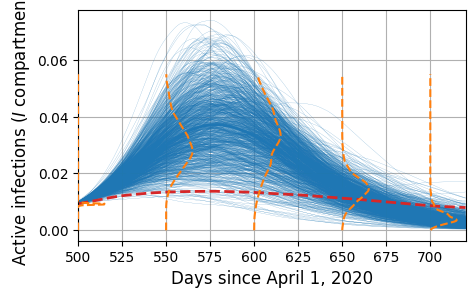

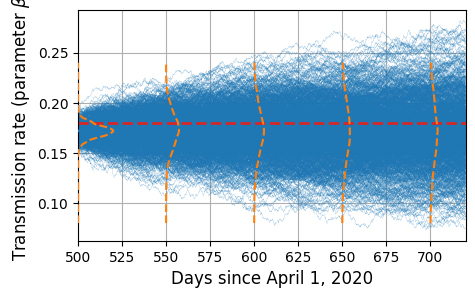

In [13]:
f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(500+tlist[0,:],i3[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(500+tlist[0,:],mean_i3,linewidth=2,c='tab:blue',zorder=2)
plt.plot(ttrue[0,:],Ytrue[1,:],linewidth=2,c='tab:red',linestyle='--',zorder=2)

plt.plot(500+Ipdf3_0*15,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(550+Ipdf3_5*15,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(600+Ipdf3_10*15,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(650+Ipdf3_15*15,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(700+Ipdf3_20*15,Igrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
# plt.fill_between(272+t,x_mean[1,:]+3*np.sqrt(x_var[5,:]),x_mean[1,:]-3*np.sqrt(x_var[5,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
# plt.xticks([272, 279, 286,293,300])
plt.xlim([500,720])
# plt.ylim([0,0.055])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Active infections ($I$ compartment)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('forecast_i_3.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(500+tlist[0,:],b3[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(500+tlist[0,:],mean_b3,linewidth=2,c='tab:blue',zorder=3)
plt.plot([500,720],[0.18,0.18],linewidth=2,c='tab:red',linestyle='--',zorder=2)
plt.plot(500+Bpdf_0(Bgrd)*20/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(550+Bpdf_5(Bgrd)*20/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(600+Bpdf_10(Bgrd)*20/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(650+Bpdf_15(Bgrd)*20/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
plt.plot(700+Bpdf_20(Bgrd)*20/Bmax,Bgrd,linewidth=1.5,c='tab:orange',linestyle='--',zorder=3)
# plt.fill_between(272+t,x_mean[3,:]+3*np.sqrt(x_var[15,:]),x_mean[3,:]-3*np.sqrt(x_var[15,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
# plt.xticks([272, 279, 286,293,300])
plt.xlim([500,720])
# plt.ylim([0.08,0.24])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Transmission rate (parameter $\beta$)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('forecast_beta_3.pdf',bbox_inches='tight')

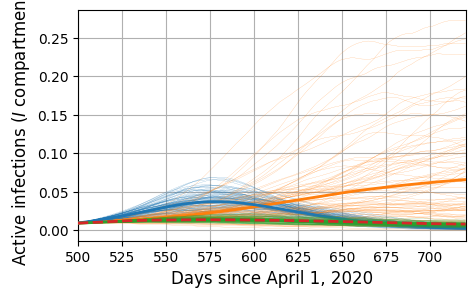

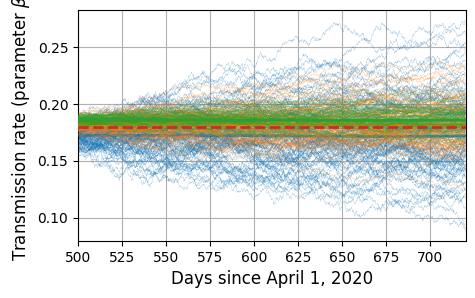

In [14]:
skip = 10

f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(500+tlist[0,:],i1[::skip].T,linewidth=0.1,c='tab:green',zorder=4)
plt.plot(500+tlist[0,:],mean_i1,linewidth=2,c='tab:green',zorder=4)
plt.plot(500+tlist[0,:],i2[::skip].T,linewidth=0.1,c='tab:orange',zorder=3)
plt.plot(500+tlist[0,:],mean_i2,linewidth=2,c='tab:orange',zorder=3)
plt.plot(500+tlist[0,:],i3[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(500+tlist[0,:],mean_i3,linewidth=2,c='tab:blue',zorder=3)
plt.plot(ttrue[0,:],Ytrue[1,:],linewidth=2,c='tab:red',linestyle='--',zorder=5)
# plt.plot(272+Ipdf_0(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+7+Ipdf_7(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+14+Ipdf_14(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+21+Ipdf_21(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+28+Ipdf_28(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.fill_between(272+t,x_mean[1,:]+3*np.sqrt(x_var[5,:]),x_mean[1,:]-3*np.sqrt(x_var[5,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
# plt.xticks([272, 279, 286,293,300])
plt.xlim([500,720])
# plt.ylim([0,0.07])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Active infections ($I$ compartment)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('forecast_i_123.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(500+tlist[0,:],b1[::skip].T,linewidth=0.1,c='tab:green',zorder=4)
plt.plot(500+tlist[0,:],mean_b1,linewidth=2,c='tab:green',zorder=4)
plt.plot(500+tlist[0,:],b2[::skip].T,linewidth=0.1,c='tab:orange',zorder=3)
plt.plot(500+tlist[0,:],mean_b2,linewidth=2,c='tab:orange',zorder=3)
plt.plot(500+tlist[0,:],b3[::skip].T,linewidth=0.1,c='tab:blue',zorder=2)
plt.plot(500+tlist[0,:],mean_b3,linewidth=2,c='tab:blue',zorder=2)
plt.plot([500,720],[0.18,0.18],linewidth=2,c='tab:red',linestyle='--',zorder=5)
# plt.plot(272+Bpdf_0(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+7+Bpdf_7(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+14+Bpdf_14(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+21+Bpdf_21(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+28+Bpdf_28(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.fill_between(272+t,x_mean[3,:]+3*np.sqrt(x_var[15,:]),x_mean[3,:]-3*np.sqrt(x_var[15,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
# plt.xticks([272, 279, 286,293,300])
plt.xlim([500,720])
# plt.ylim([0,0.3])
plt.xlabel('Days since April 1, 2020', fontsize=12)
plt.ylabel(r'Transmission rate (parameter $\beta$)', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('forecast_beta_123.pdf',bbox_inches='tight')

In [15]:
percentile05_1i, percentile95_1i = np.percentile(i1[:,::], 5, axis=0), np.percentile(i1[:,::], 95, axis=0) 
percentile05_1b, percentile95_1b = np.percentile(b1[:,::], 5, axis=0), np.percentile(b1[:,::], 95, axis=0) 

percentile05_2i, percentile95_2i = np.percentile(i2[:,::], 5, axis=0), np.percentile(i2[:,::], 95, axis=0) 
percentile05_2b, percentile95_2b = np.percentile(b2[:,::], 5, axis=0), np.percentile(b2[:,::], 95, axis=0) 

percentile05_3i, percentile95_3i = np.percentile(i3[:,::], 5, axis=0), np.percentile(i3[:,::], 95, axis=0) 
percentile05_3b, percentile95_3b = np.percentile(b3[:,::], 5, axis=0), np.percentile(b3[:,::], 95, axis=0) 

In [16]:
fb = np.array([142,186,217])/np.array(255)
fo = np.array([255,190,134])/np.array(255)
fg = np.array([149,207,149])/np.array(255)

(1000, 2200)


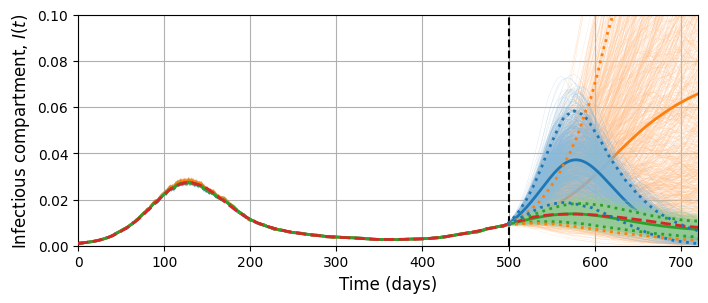

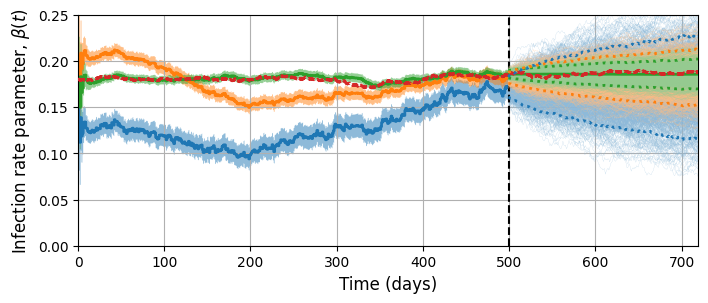

In [ ]:
skip = 10
print(np.shape(i1))
mpl.rcParams.update({'font.size':10})

f, ax = plt.subplots(1, figsize=(8,3))
plt.fill_between(t,x3_mean[1,:]+1.96*np.sqrt(x3_var[5,:]),x3_mean[1,:]-1.96*np.sqrt(x3_var[5,:]),facecolor='tab:blue',alpha=0.5)
plt.fill_between(t,x2_mean[1,:]+1.96*np.sqrt(x2_var[4,:]),x2_mean[1,:]-1.96*np.sqrt(x2_var[4,:]),facecolor='tab:orange',alpha=0.5)
plt.fill_between(t,x1_mean[1,:]+1.96*np.sqrt(x1_var[5,:]),x1_mean[1,:]-1.96*np.sqrt(x1_var[5,:]),facecolor='tab:green',alpha=0.5)
plt.plot(500+tlist[0,::skip],i1[:,::skip].T,linewidth=0.1,c=fg,zorder=4)
plt.plot(500+tlist[0,:],mean_i1,linewidth=2,c='tab:green',zorder=4)
plt.plot(500+tlist[0,::skip],i2[:,::skip].T,linewidth=0.1,c=fo,zorder=2)
plt.plot(500+tlist[0,:],mean_i2,linewidth=2,c='tab:orange',zorder=2)
plt.plot(500+tlist[0,::skip],i3[:,::skip].T,linewidth=0.1,c=fb,zorder=3)
plt.plot(500+tlist[0,:],mean_i3,linewidth=2,c='tab:blue',zorder=3)

plt.plot(ttrue[0,:],Ytrue[1,:],linewidth=2,c='tab:red',linestyle='--',zorder=5)
plt.plot(t,x3_mean[1,:],linewidth=2,c='tab:blue')
plt.plot(t,x2_mean[1,:],linewidth=2,c='tab:orange')
plt.plot(t,x1_mean[1,:],linewidth=2,c='tab:green')

plt.plot(500+tlist[0,:],percentile05_1i,linewidth=2,c='tab:green',linestyle=':',zorder=10)
plt.plot(500+tlist[0,:],percentile95_1i,linewidth=2,c='tab:green',linestyle=':',zorder=10)
plt.plot(500+tlist[0,:],percentile05_2i,linewidth=2,c='tab:orange',linestyle=':',zorder=10)
plt.plot(500+tlist[0,:],percentile95_2i,linewidth=2,c='tab:orange',linestyle=':',zorder=10)
plt.plot(500+tlist[0,:],percentile05_3i,linewidth=2,c='tab:blue',linestyle=':',zorder=10)
plt.plot(500+tlist[0,:],percentile95_3i,linewidth=2,c='tab:blue',linestyle=':',zorder=10)

# plt.plot(272+Ipdf_0(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+7+Ipdf_7(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+14+Ipdf_14(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+21+Ipdf_21(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+28+Ipdf_28(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.fill_between(272+t,x_mean[1,:]+3*np.sqrt(x_var[5,:]),x_mean[1,:]-3*np.sqrt(x_var[5,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.axvline(500,c='k', linestyle='--')
plt.grid(True)
# plt.xticks([272, 279, 286,293,300])
plt.xlim([0,720])
plt.ylim([0,0.1])
plt.yticks([0,0.02,0.04,0.06,0.08,0.1])
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel(r'Infectious compartment, $I(t)$', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('forecast_i_123.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(8,3))
plt.fill_between(t,x3_mean[3,:]+1.96*np.sqrt(x3_var[15,:]),x3_mean[3,:]-1.96*np.sqrt(x3_var[15,:]),facecolor='tab:blue',alpha=0.5)
plt.fill_between(t,x2_mean[2,:]+1.96*np.sqrt(x2_var[8,:]),x2_mean[2,:]-1.96*np.sqrt(x2_var[8,:]),facecolor='tab:orange',alpha=0.5)
plt.fill_between(t,x1_mean[3,:]+1.96*np.sqrt(x1_var[15,:]),x1_mean[3,:]-1.96*np.sqrt(x1_var[15,:]),facecolor='tab:green',alpha=0.5)
plt.plot(500+tlist[0,::skip],b1[:,::skip].T,linewidth=0.1,c=fg,zorder=4)
plt.plot(500+tlist[0,:],mean_b1,linewidth=2,c='tab:green',zorder=4)
plt.plot(500+tlist[0,::skip],b2[:,::skip].T,linewidth=0.1,c=fo,zorder=3)
plt.plot(500+tlist[0,:],mean_b2,linewidth=2,c='tab:orange',zorder=3)
plt.plot(500+tlist[0,::skip],b3[:,::skip].T,linewidth=0.1,c=fb,zorder=2)
plt.plot(500+tlist[0,:],mean_b3,linewidth=2,c='tab:blue',zorder=2)

plt.plot(ttrue[0,:],Ytrue[3,:],linewidth=2,c='tab:red',linestyle='--',zorder=5)
plt.plot(t,x3_mean[3,:],linewidth=2,c='tab:blue')
plt.plot(t,x2_mean[2,:],linewidth=2,c='tab:orange')
plt.plot(t,x1_mean[3,:],linewidth=2,c='tab:green')

plt.plot(500+tlist[0,::skip],percentile05_1b[::skip],linewidth=2,c='tab:green',linestyle=':',zorder=10)
plt.plot(500+tlist[0,::skip],percentile95_1b[::skip],linewidth=2,c='tab:green',linestyle=':',zorder=10)
plt.plot(500+tlist[0,::skip],percentile05_2b[::skip],linewidth=2,c='tab:orange',linestyle=':',zorder=10)
plt.plot(500+tlist[0,::skip],percentile95_2b[::skip],linewidth=2,c='tab:orange',linestyle=':',zorder=10)
plt.plot(500+tlist[0,::skip],percentile05_3b[::skip],linewidth=2,c='tab:blue',linestyle=':',zorder=10)
plt.plot(500+tlist[0,::skip],percentile95_3b[::skip],linewidth=2,c='tab:blue',linestyle=':',zorder=10)
# plt.plot(272+Bpdf_0(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+7+Bpdf_7(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+14+Bpdf_14(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+21+Bpdf_21(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+28+Bpdf_28(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.fill_between(272+t,x_mean[3,:]+3*np.sqrt(x_var[15,:]),x_mean[3,:]-3*np.sqrt(x_var[15,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.axvline(500,c='k', linestyle='--')
plt.grid(True)
# plt.xticks([272, 279, 286,293,300])
plt.xlim([0,719])
plt.ylim([0,0.25])
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel(r'Infection rate parameter, $\beta(t)$', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('forecast_beta_123.pdf',bbox_inches='tight')

(1000, 2200)


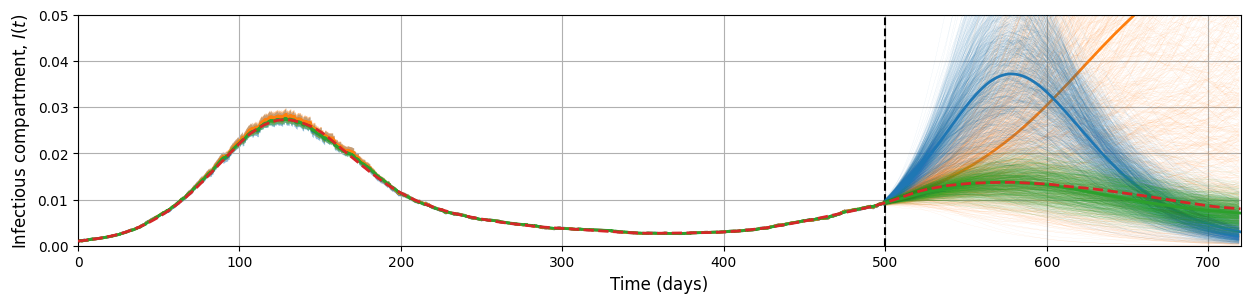

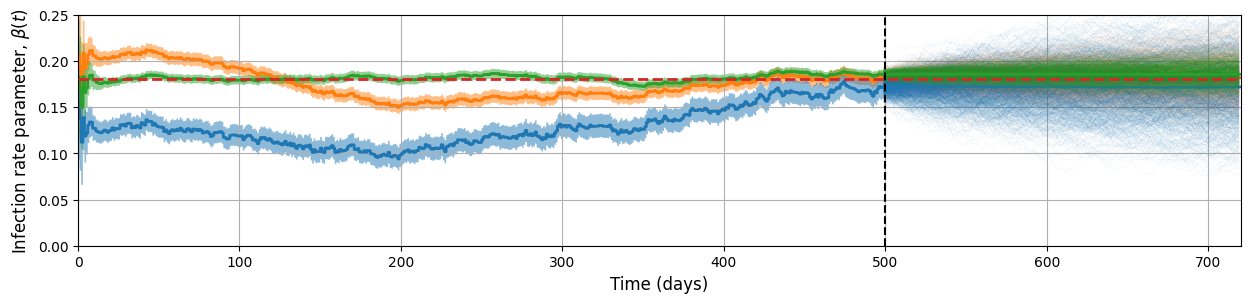

In [18]:
skip = 10
print(np.shape(i1))

f, ax = plt.subplots(1, figsize=(15,3))
plt.plot(t,x3_mean[1,:],linewidth=2,c='tab:blue')
plt.plot(t,x2_mean[1,:],linewidth=2,c='tab:orange')
plt.plot(t,x1_mean[1,:],linewidth=2,c='tab:green')
plt.fill_between(t,x3_mean[1,:]+1.96*np.sqrt(x3_var[5,:]),x3_mean[1,:]-1.96*np.sqrt(x3_var[5,:]),facecolor='tab:blue',alpha=0.5)
plt.fill_between(t,x2_mean[1,:]+1.96*np.sqrt(x2_var[4,:]),x2_mean[1,:]-1.96*np.sqrt(x2_var[4,:]),facecolor='tab:orange',alpha=0.5)
plt.fill_between(t,x1_mean[1,:]+1.96*np.sqrt(x1_var[5,:]),x1_mean[1,:]-1.96*np.sqrt(x1_var[5,:]),facecolor='tab:green',alpha=0.5)
plt.plot(500+tlist[0,::10],i1[:,::skip].T,linewidth=0.1,c='tab:green',zorder=4,alpha=0.25)
plt.plot(500+tlist[0,:],mean_i1,linewidth=2,c='tab:green',zorder=4)
plt.plot(500+tlist[0,::10],i2[:,::skip].T,linewidth=0.1,c='tab:orange',zorder=2,alpha=0.25)
plt.plot(500+tlist[0,:],mean_i2,linewidth=2,c='tab:orange',zorder=2)
plt.plot(500+tlist[0,::10],i3[:,::skip].T,linewidth=0.1,c='tab:blue',zorder=3,alpha=0.25)
plt.plot(500+tlist[0,:],mean_i3,linewidth=2,c='tab:blue',zorder=3)
plt.plot(ttrue[0,:],Ytrue[1,:],linewidth=2,c='tab:red',linestyle='--',zorder=5)
plt.plot([500,500],[0,0.1],'k--')
# plt.plot(272+Ipdf_0(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+7+Ipdf_7(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+14+Ipdf_14(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+21+Ipdf_21(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+28+Ipdf_28(Igrd)*6/Imax,Igrd,linewidth=2,c='tab:green',zorder=3)
# plt.fill_between(272+t,x_mean[1,:]+3*np.sqrt(x_var[5,:]),x_mean[1,:]-3*np.sqrt(x_var[5,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
# plt.xticks([272, 279, 286,293,300])
plt.xlim([0,720])
plt.ylim([0,0.05])
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel(r'Infectious compartment, $I(t)$', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('forecast_i_123.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(15,3))
plt.plot(t,x3_mean[3,:],linewidth=2,c='tab:blue')
plt.plot(t,x2_mean[2,:],linewidth=2,c='tab:orange')
plt.plot(t,x1_mean[3,:],linewidth=2,c='tab:green')
plt.fill_between(t,x2_mean[2,:]+1.96*np.sqrt(x2_var[8,:]),x2_mean[2,:]-1.96*np.sqrt(x2_var[8,:]),facecolor='tab:orange',alpha=0.5)
plt.fill_between(t,x3_mean[3,:]+1.96*np.sqrt(x3_var[15,:]),x3_mean[3,:]-1.96*np.sqrt(x3_var[15,:]),facecolor='tab:blue',alpha=0.5)
plt.fill_between(t,x1_mean[3,:]+1.96*np.sqrt(x1_var[15,:]),x1_mean[3,:]-1.96*np.sqrt(x1_var[15,:]),facecolor='tab:green',alpha=0.5)
plt.plot(500+tlist[0,::skip],b1[:,::skip].T,linewidth=0.1,c='tab:green',zorder=4,alpha=0.25)
plt.plot(500+tlist[0,:],mean_b1,linewidth=2,c='tab:green',zorder=4)
plt.plot(500+tlist[0,::skip],b2[:,::skip].T,linewidth=0.1,c='tab:orange',zorder=2,alpha=0.25)
plt.plot(500+tlist[0,:],mean_b2,linewidth=2,c='tab:orange',zorder=2)
plt.plot(500+tlist[0,::skip],b3[:,::skip].T,linewidth=0.1,c='tab:blue',zorder=3,alpha=0.25)
plt.plot(500+tlist[0,:],mean_b3,linewidth=2,c='tab:blue',zorder=3)
plt.plot([0,720],[0.18,0.18],linewidth=2,c='tab:red',linestyle='--',zorder=5)
plt.plot([500,500],[0,0.25],'k--',zorder=6)
# plt.plot(272+Bpdf_0(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+7+Bpdf_7(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+14+Bpdf_14(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+21+Bpdf_21(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.plot(272+28+Bpdf_28(Bgrd)*6/Bmax,Bgrd,linewidth=2,c='tab:green',zorder=3)
# plt.fill_between(272+t,x_mean[3,:]+3*np.sqrt(x_var[15,:]),x_mean[3,:]-3*np.sqrt(x_var[15,:]),facecolor='tab:blue',alpha=0.25,zorder=0)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
# plt.xticks([272, 279, 286,293,300])
plt.xlim([0,720])
plt.ylim([0,0.25])
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel(r'Infection rate parameter, $\beta(t)$', fontsize=12)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('forecast_beta_123.pdf',bbox_inches='tight')